In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import sympy as sym
from sympy import init_printing
from scipy.interpolate import make_interp_spline
from scipy.stats import chi2


## Punto 1

In [2]:
def f1(x): return 2*x - 2
def f2(x): return (1-x)/2


def f3(x): return 4-x


In [3]:
coeficientes = np.array([[2, -1], [1, 2], [1, 1]])
resol = np.array([2, 1, 4])


In [4]:
coeff = np.dot(coeficientes.T, coeficientes)
resul = np.dot(coeficientes.T, resol)

solucion = np.linalg.solve(coeff, resul)


In [5]:
solucion


array([1.42857143, 0.42857143])

In [6]:
x = np.linspace(-5, 5, 100)


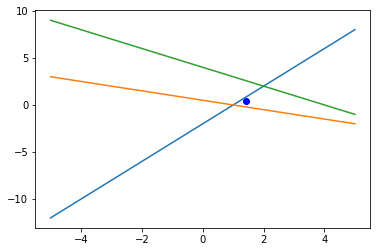

In [7]:
plt.plot(x, f1(x))
plt.plot(x, f2(x))
plt.plot(x, f3(x))
plt.scatter(solucion[0], solucion[1], c='b')


In [8]:
y = np.copy(x)

X, Y = np.meshgrid(x, y)
funcion = np.zeros((100, 100))


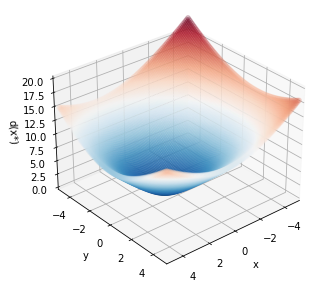

In [9]:
for i in range(len(y)):
    for j in range(len(x)):
        evaluar = np.array([x[j], y[i]])
        funcion[i, j] = np.linalg.norm(np.dot(coeficientes, evaluar)-resol)

f = plt.figure(figsize=(5, 5))
g = f.add_subplot(111, projection='3d')

g.set_zlabel(r'd(x*)')
g.set_xlabel(r'x')
g.set_ylabel(r'y')
g.view_init(30, 50)

g.set_xlim3d(-5, 5)
g.set_ylim3d(-5, 5)
g.set_zlim3d(0, 20)

g.scatter(X, Y, funcion, c=funcion, cmap='RdBu_r', alpha=0.2)
plt.show()


## Punto 6

<img src="https://i3.lensdump.com/i/1hBm91.jpg" alt="1hBm91.jpg" border="0" />

<img src="https://i.lensdump.com/i/1hBsvc.jpg" alt="1hBsvc.jpg" border="0" />

## Punto 7

In [10]:
data = pd.read_csv('Sigmoid.csv')


In [11]:
def fit_model(x, a, b, c):
    return a / (b + np.exp(-c * x))


def sym_fit(x, a, b, c):
    return a / (b + sym.exp(-c * x))


def cost_function(x, y, a, b, c):
    return np.sum((y - fit_model(x, a, b, c))**2)


def symbolic_cost_function(x, y, a, b, c):
    return sym.Sum((y - sym_fit(x, a, b, c))**2, (x, 0, len(data['x'])))


def partial_symbolic_derivative():
    x = sym.symbols('x')
    y = sym.symbols('y')
    a = sym.symbols('theta_0')
    b = sym.symbols('theta_1')
    c = sym.symbols('theta_2')
    sym_cost = symbolic_cost_function(x, y, a, b, c)
    return sym.diff(sym_cost, a), sym.diff(sym_cost, b), sym.diff(sym_cost, c)


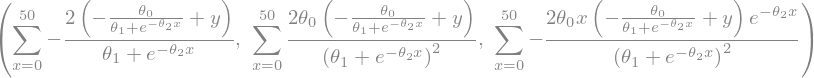

In [12]:
init_printing(use_latex=True)

partial_symbolic_derivative()


<img src="https://i.lensdump.com/i/1htIk1.jpg" alt="1htIk1.jpg" border="0" />

In [13]:
def partial_derivative(x, y, a, b, c):
    partial_a = 0
    partial_b = 0
    partial_c = 0
    for i in range(len(x)):
        partial_a += 2 * \
            (a / (b + np.exp(-c * x[i])) - y[i]) / (b + np.exp(-c * x[i]))
        partial_b += 2 * \
            (a / (b + np.exp(-c * x[i])) - y[i]) * a * \
            np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
        partial_c += 2 * (a / (b + np.exp(-c * x[i])) - y[i]) * \
            a * x[i] * np.exp(-c * x[i]) / (b + np.exp(-c * x[i]))**2
    return partial_a, partial_b, partial_c


def gradient_descent(x, y, a, b, c, learning_rate, iterations, e):
    for i in range(iterations):
        partial_a, partial_b, partial_c = partial_derivative(x, y, a, b, c)
        a = a - learning_rate * partial_a
        b = b - learning_rate * partial_b
        c = c - learning_rate * partial_c
        if (abs(partial_a) < e) and (abs(partial_b) < e) and (abs(partial_c) < e):
            break
    return a, b, c, i


In [14]:
model = gradient_descent(data['x'], data['y'], 1, 1, 1, 0.0005, 10000, 0.01)


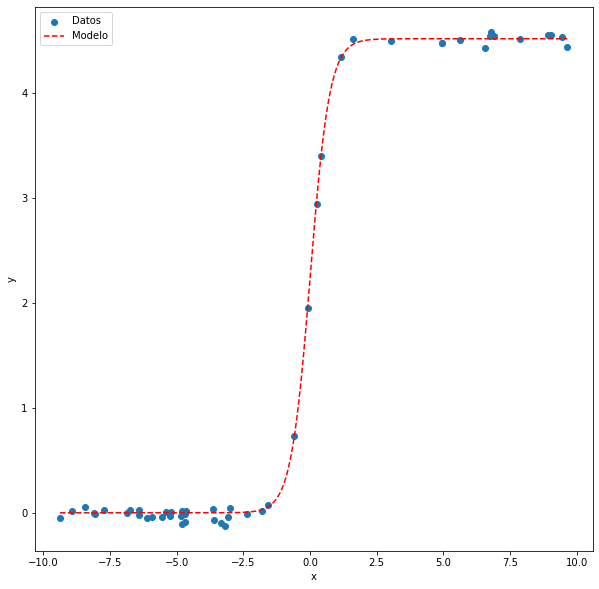

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
y_model = np.sort(fit_model(data['x'], model[0], model[1], model[2]))

x = np.linspace(data['x'].min(), data['x'].max(), 500)
y_model = fit_model(x, model[0], model[1], model[2])

ax.scatter(data['x'], data['y'], label='Datos')
ax.plot(x, y_model, label='Modelo', color='red', linestyle='dashed')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


## Punto 8

In [16]:
b = np.array([-3, -3, 8, 9])
u1 = [3, 1, 0, 1]
u2 = [1, 2, 1, 1]
u3 = [-1, 0, 2, -1]
